In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Cardiac\ Project/Registration_phase/based \on \doc2

/content/drive/MyDrive/Cardiac Project/Registration_phase/based on doc2


In [3]:
import os
import cv2
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import exposure
from skimage import img_as_float

# imports from file
from scripts.phase3 import *

In [4]:
# Reading Dataset
dataset = read_dataset('dataset/ok4/1461340/')
zoom_percentage = 0.83
# Histogram Matching
matched_dataset = Histogram_Matching(dataset)

MetaData Readed.
Images Readed.
Histogram Matching Done!


In [5]:
#Resize-Pad step
r_p_dataset = resize_pad(matched_dataset , zoom_percentage)

#crop bb step
croped_dataset = crop_bb(r_p_dataset)

Resize-Pad step Done!
Crop-bb Done!


In [ ]:
len(croped_dataset)

5

'dataset/ok4/1506521/1/img0007--104.643.png'

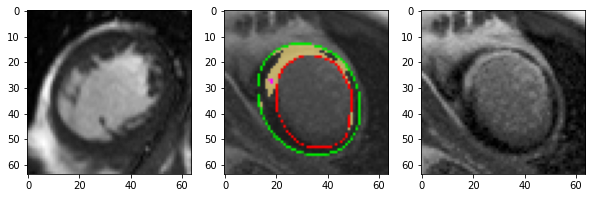

In [ ]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3 , figsize = (10,10))
c_lge_item , cine_item , lge_item = croped_dataset[4]

ax1.imshow(cine_item[0]  , cmap = 'gray')
ax2.imshow(c_lge_item[0] , cmap = 'gray')
ax3.imshow(lge_item[0] , cmap = 'gray')
lge_item[3]

In [ ]:
#save_results(croped_dataset)

Save results Done!


# For bad dims

In [ ]:
new_dataset = []

In [ ]:
len(matched_dataset)

7

In [ ]:
instance_number = 0
c_lge_item , cine_item , lge_item = matched_dataset[instance_number]
lge = lge_item[0]
lge_shape = lge_item[0].shape
c_lge = c_lge_item[0]
c_lge_item[3]

'dataset/ok4/1506521/4/img0006-unknown.png'

In [ ]:
left_margin , top_margin = determine_indexs(cv2.cvtColor(c_lge, cv2.COLOR_RGB2GRAY))
unmargin_c_lge = crop_margins(c_lge , left_margin , top_margin)

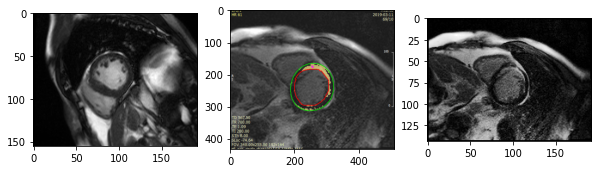

In [ ]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3 , figsize = (10,10))

ax1.imshow(cine_item[0] , cmap = 'gray')
ax2.imshow(unmargin_c_lge)
ax3.imshow(lge_item[0] , cmap = 'gray')

In [ ]:
top_pad , left_pad = determine_pad(unmargin_c_lge , lge_shape , zoom_percentage)
print(top_pad , left_pad)

Horizon
0 32.640000000000015


In [ ]:
top_pad = 10
left_pad = 60

In [ ]:
paded_c_lge = pad_image(unmargin_c_lge , int(left_pad) , int(top_pad))

In [ ]:
#paded_c_lge = paded_c_lge[: , 45:-45 , :]

In [ ]:
c_lge_resized = cv2.resize(paded_c_lge, (lge.shape[1] , lge.shape[0]))
c_lge_item = (c_lge_resized ,c_lge_item[1] , c_lge_item[2]  , c_lge_item[3])

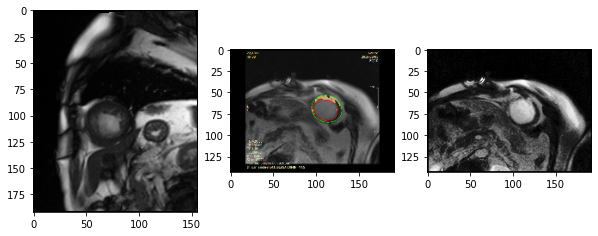

In [ ]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3 , figsize = (10,10))

ax1.imshow(cine_item[0] , cmap = 'gray')
ax2.imshow(c_lge_resized)
ax3.imshow(lge_item[0] , cmap = 'gray')

In [ ]:
new_dataset.append((c_lge_item , cine_item , lge_item))


In [ ]:
croped_dataset = crop_bb(new_dataset)

Crop-bb Done!


In [ ]:
len(croped_dataset)

1

'dataset/ok1,2/1544127/3/img0019--91.5896.png'

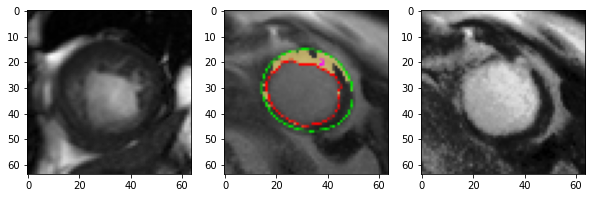

In [ ]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3 , figsize = (10,10))

c_lge_item , cine_item , lge_item = croped_dataset[0]
ax1.imshow(cine_item[0] , cmap = 'gray')
ax2.imshow(c_lge_item[0])
ax3.imshow(lge_item[0] , cmap = 'gray')
cine_item[3]

In [6]:
save_results(croped_dataset)

Save results Done!
